<a href="https://colab.research.google.com/github/themathedges/3YP-Standalone-Kennington/blob/main/Ravi/River_Level_Data_Plot_Ravi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# River Level Data Exploration
Author: Ravi Kohli

Date: November 15th, 2020

College: Christ Church

Data was collected from River Levels.co.uk:

This data is available at
https://riverlevels.uk/thames-sandford-on-thames#.X7F_zBP7TVo



Dataset documentation explanation of the columns: (taken from documentation)
- Date
- min_level : Minimum river level recorded on that day **Units metres**
- avg_level : Average river level recorded on that day **Units metres**
- max_level : Maximum river level recorded on that day **Units metres**

**NOTE:** if running this notebook on your own computer, then just ignore this cell below

In [1]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# importing the modules
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# Retrieving the precipitation data
path = '/content/drive/My Drive/3YP/data/'    # when running in a notebook in colab
#path = '../data/'                            # when running from an external notebook

filename = "thames-sandford-on-thames.csv" # the name of the csv file
df = pd.read_csv(path+filename)               # converting the csv file to a dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2902 entries, 0 to 2901
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2902 non-null   object 
 1   min_level  2902 non-null   float64
 2   avg_level  2902 non-null   float64
 3   max_level  2902 non-null   float64
dtypes: float64(3), object(1)
memory usage: 90.8+ KB


In [5]:
df

,date,min_level,avg_level,max_level
0,2012-11-26,0.370,0.380,0.400
1,2012-11-27,0.560,0.570,0.570
2,2012-11-28,0.510,0.540,0.560
3,2012-11-29,0.450,0.480,0.510
4,2012-11-30,0.370,0.410,0.440
...,...,...,...,...
2897,2020-11-10,0.046,0.064,0.100
2898,2020-11-11,0.056,0.074,0.111
2899,2020-11-12,0.109,0.121,0.143
2900,2020-11-13,0.030,0.108,0.150


## Data Preprocessing

In [6]:
df['date'] =  pd.to_datetime(df['date'])                          # convert the column to datetime
#df['YYYY'] = pd.to_numeric(df['YYYY'], downcast = 'integer')     # other option is to convert the data to integere

In [7]:
df

,date,min_level,avg_level,max_level
0,2012-11-26,0.370,0.380,0.400
1,2012-11-27,0.560,0.570,0.570
2,2012-11-28,0.510,0.540,0.560
3,2012-11-29,0.450,0.480,0.510
4,2012-11-30,0.370,0.410,0.440
...,...,...,...,...
2897,2020-11-10,0.046,0.064,0.100
2898,2020-11-11,0.056,0.074,0.111
2899,2020-11-12,0.109,0.121,0.143
2900,2020-11-13,0.030,0.108,0.150


In [8]:
print(df.dtypes)        # showing the data types are as we expected

date         datetime64[ns]
min_level           float64
avg_level           float64
max_level           float64
dtype: object


## Exploratory Analysis

### Annual

Now we can begin to produce some initial exploratory plots

In [9]:
river_level_df = df

In [10]:
river_level_df['SMA_avg_30'] = river_level_df.avg_level.rolling(30).mean()     # 30 day moving average for avg_level
river_level_df['SMA_max_30'] = river_level_df.max_level.rolling(30).mean()     # 30 day moving average for max_level
river_level_df['SMA_min_30'] = river_level_df.min_level.rolling(30).mean()     # 30 day moving average for min_level

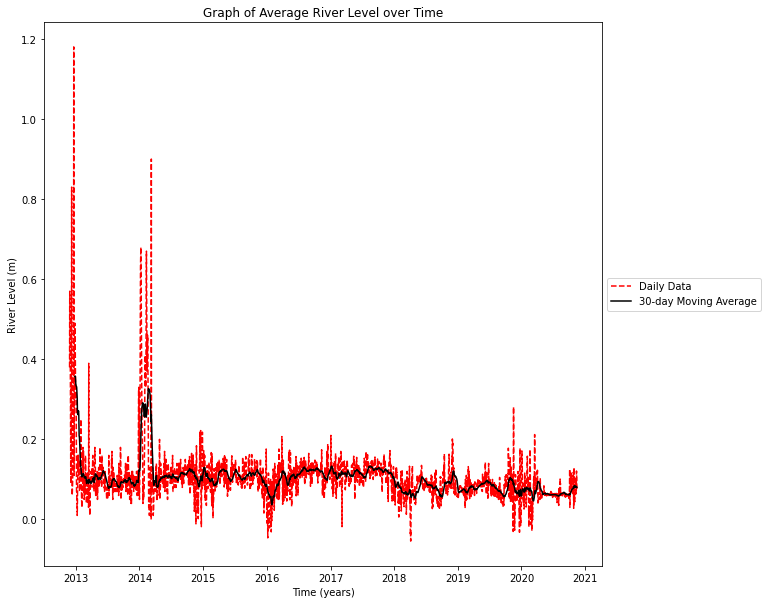

In [11]:
# Annual Graph over time
river_fig, river_ax = plt.subplots(figsize = (10, 10))
river_ax.plot(river_level_df['date'], river_level_df['avg_level'], 'r--', label = 'Daily Data')
river_ax.plot(river_level_df['date'], river_level_df['SMA_avg_30'], color = 'k', label = '30-day Moving Average')   
river_ax.set(title = 'Graph of Average River Level over Time', xlabel= 'Time (years)', ylabel='River Level (m)')
river_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : '22'}

matplotlib.rc('font', **font)

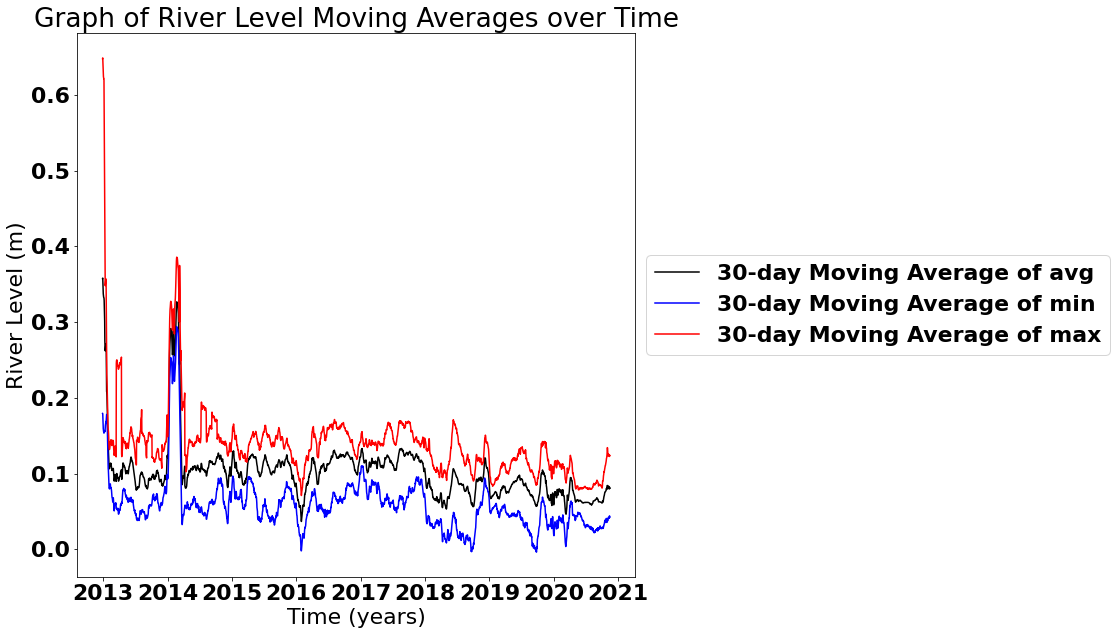

In [13]:
# plotting all the moving averages together
river_sma_fig, river_sma_ax = plt.subplots(figsize = (10, 10))
river_sma_ax.plot(river_level_df['date'], river_level_df['SMA_avg_30'], color = 'k', label = '30-day Moving Average of avg')
river_sma_ax.plot(river_level_df['date'], river_level_df['SMA_min_30'], color = 'b', label = '30-day Moving Average of min')
river_sma_ax.plot(river_level_df['date'], river_level_df['SMA_max_30'], color = 'r', label = '30-day Moving Average of max')   
river_sma_ax.set(title = 'Graph of River Level Moving Averages over Time', xlabel= 'Time (years)', ylabel='River Level (m)')
river_sma_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : '22'}

matplotlib.rc('font', **font)